# Classification with k-NN

### 1. The IRIS dataset

The Iris flower data set is a data set describing the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In this work, you will use the Iris dataset, considering only two of the three species of Iris.

---

We start by loading the dataset. The Iris dataset is available directly as part of `scikit-learn`and we use the `scikit-learn` command `load_iris` to retrieve the data.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets as data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




# Load dataset and print its description
iris = data.load_iris()
print(iris.DESCR)

data_X = iris.data[50:,:]          # Select only 2 classes
data_y = 2 * iris.target[50:] - 3  # Set output to {-1, +1}

# Get dimensions
num_products = data_X.shape[0]
num_features = data_X.shape[1]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

---

#### Activity 1.        

* Split the data into training and test sets. To build the train and test sets, you can use the function `train_test_split` from the module `model_selection` of `scikit-learn`. Make sure that the test set corresponds to 1/10th of your data. For reproducibility, set `random_state` to some fixed value.


**Note:** Keep in mind that the test data should not be used for any design or validation decisions.

---

In [24]:
# Split data into training and testing sets at 70%
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=42)

---

#### Activity 2.  

* Plot the training data. In particular, for every pair of features/attributes, create a scatter plot where different classes are plotted with different symbols. You may find useful the `subplot` command from `matplotlib.pyplot`.


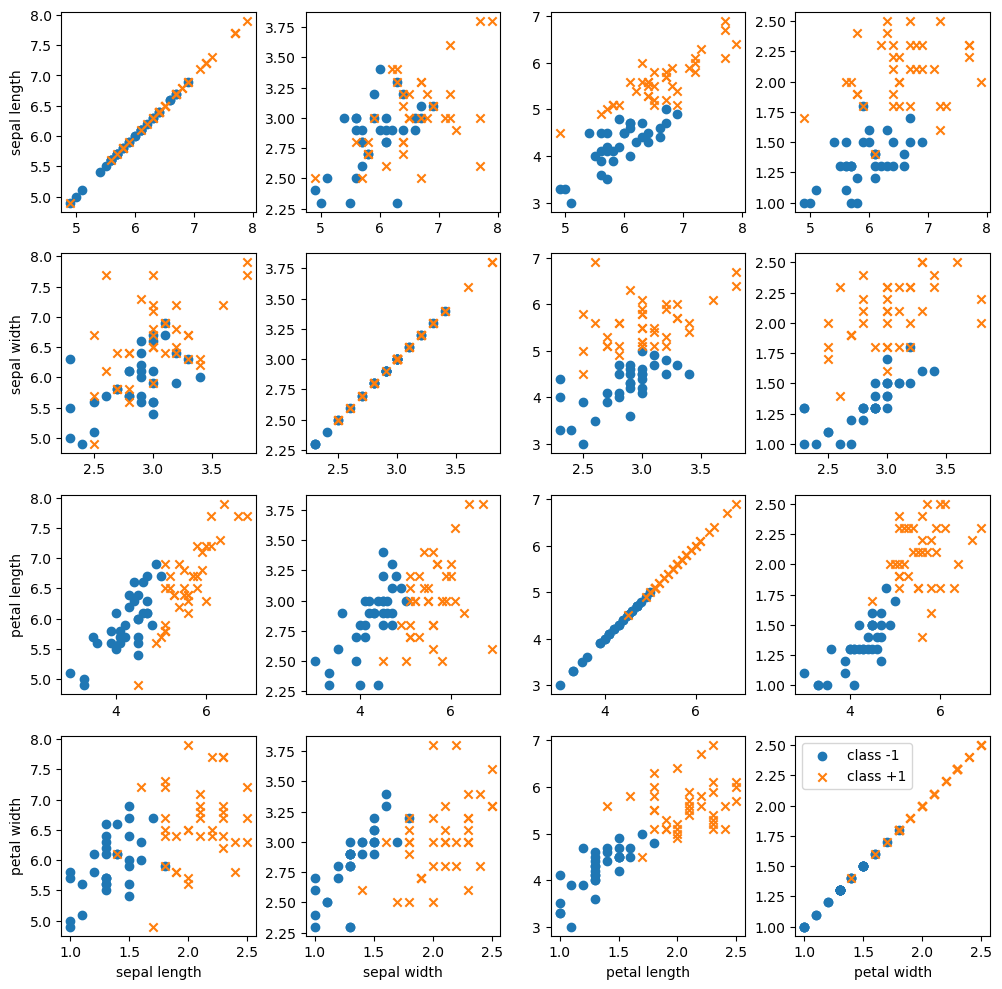

In [25]:
# Feature names
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))
# Plot data

for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(X_train[y_train == -1, i], X_train[y_train == -1, j], marker='o', label='class -1')
        axes[i, j].scatter(X_train[y_train == 1, i], X_train[y_train == 1, j], marker='x', label='class +1')

        if i == num_features - 1:
            axes[i, j].set_xlabel(feature_names[j])
        if j == 0:
            axes[i, j].set_ylabel(feature_names[i])

plt.tight_layout()
plt.legend()
plt.show()

---

#### Activity 3.  

* Fit the k-nearest neighbor classifier to the training set from Activity 1, using a k = 3. The algorithm can be imported from the `sklearn.neighbors` library under the name `KNeighborsClassifier`.

In [26]:
# Making classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

---

#### Activity 4.  

* Print the predictions of the test set
* Print the true classes in the test set
* Print the test set accuracy
* Print the confusion matrix of the test set
* Print the test set precision
* Print the test set recall
* Print the test set f1 score

These algorithms to compute these metrics can be imported from the `sklearn.metrics`.

Predictions [-1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1 -1 -1  1 -1  1]


<Axes: >

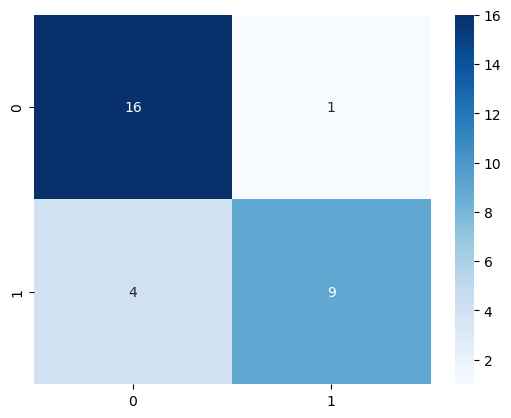

In [27]:
y_predict = knn.predict(X_test)
print("Predictions", y_predict)

Conf_Matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Conf_Matrix, annot=True, fmt='d', cmap='Blues')

#### Activity 5.  

* Fit the k-nearest neighbor classifier with k = 1, 3, 6, and 9. For each value of k, store the following metrics: accuracy, precision, recall, and f1 score. 
* Plot each metric to see how they change with different values of k.